In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/spe naice 2021/cyphercrescentlearn

/content/drive/.shortcut-targets-by-id/1P4s5xieSKsQDwndtl7HQffUIwuJDn8Pm/spe naice 2021/cyphercrescentlearn


In [3]:
# import shutil
# shutil.unpack_archive("500 fastai.zip", "drillingbitdata2021/extracted_drillingbit_500")
import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install fastai --upgrade -q
from fastai.vision.all import *
from sota_deeplearning_classifier.drillingbits.Drillingbit_sota_Utilities import *

     |████████████████████████████████| 188 kB 7.6 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 


In [5]:
drillingbit_data_generator = DataBlock(blocks=(ImageBlock, CategoryBlock),
                            get_items=get_image_files,
                            get_y=parent_label,
                            splitter=RandomSplitter(valid_pct=0.2, seed=42),
                            item_tfms=RandomResizedCrop(224, min_scale=0.5),
                            batch_tfms=aug_transforms())

In [6]:
drillingbit_dataloaders = drillingbit_data_generator.dataloaders('drillingbitdata2021/extracted_drillingbit_500')

In [7]:
drillingbit_dataloaders.vocab

['drilling bit', 'not drilling bit']

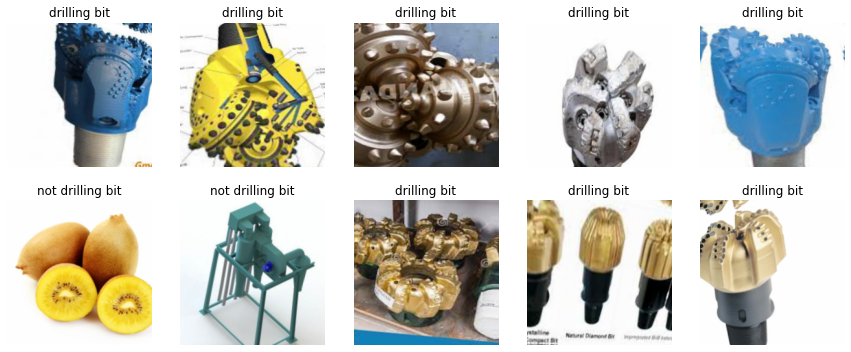

In [8]:
drillingbit_dataloaders.train.show_batch(max_n=10, nrows=2)

In [ ]:
drillingbit_dataloaders.train.show_batch(max_n=10, nrows=2, unique=True)

In [9]:
drillingbit_learner = cnn_learner(drillingbit_dataloaders, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


In [10]:
drillingbit_learner.fit_one_cycle(n_epoch=4, lr_max=3e-3)

In [11]:
drillingbit_learner.unfreeze()
drillingbit_learner.fit_one_cycle(n_epoch=6, lr_max=slice(1e-5, 5e-4))

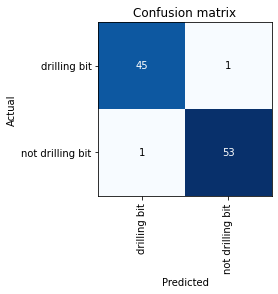

In [12]:
model_interpreter = ClassificationInterpretation.from_learner(drillingbit_learner)
model_interpreter.plot_confusion_matrix()

In [13]:
# model_interpreter.plot_top_losses(10, nrows=10)

In [14]:
#drillingbit_learner.export()

In [15]:
def Image_classifier_display_widget(model, image_shape=240):
  #define buttons
  button_run = widgets.Button(description='Classify')
  btn_upload = widgets.FileUpload()

  #define labels
  label_predict = widgets.Label()

  def model_prediction(y_prediction_label):
    label = ''
    if y_prediction_label == 1.0: label ='drilling bit'
    else: label = 'not drilling bit'
    return f'Model predicts: {label} with output label {y_prediction_label}'

  def on_click_classify(change):
    for name, file_info in btn_upload.value.items():
      img = PIL.Image.open(io.BytesIO(file_info['content']))
      plt.imshow(img)
      image = np.array(img.resize((image_shape, image_shape)))
      image_new = image.reshape(1,image_shape,image_shape,3)
      prediction_label, output_value, probability_tensor = model.predict(image)
      label_predict.value = f'{prediction_label}, {probability_tensor}'
      plt.title(label_predict.value)
      plt.show()

  button_run.on_click(on_click_classify)
  widget_display = widgets.VBox([widgets.Label('Select drilling bit image'),
      btn_upload, button_run])



Image_classifier_display_widget(drillingbit_learner, image_shape=240)

In [16]:
Image_classifier_display_widget(drillingbit_learner, image_shape=240)

KeyboardInterrupt: ignored

In [ ]:
model_data_set_cleaner = ImageClassifierCleaner(drilling_bit_learner)
model_data_set_cleaner

In [ ]:
for idx in model_data_set_cleaner.delete(): model_data_set_cleaner.fns[idx].unlink()